# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I, **Samuel Shola, Ogunyemi**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### LANGUAGE IDENTIFICATION - CLASSIFICATION HACKATHON

#### Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that the South African systems and devices also communicate in multi-languages.

The purpose of this challenge is to take text which is in any of South Africa's 11 Official languages and identify which language the text is in. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [376]:
from comet_ml import Experiment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, log_loss, recall_score, confusion_matrix\

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint
from tensorflow.keras.utils import to_categorical

from sklearn.utils import resample

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `train.csv` file into a DataFrame. |

---

In [3]:
df = pd.read_csv("train_set.csv")
df_test = pd.read_csv("test_set.csv")
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [47]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |



Here we use various methods to take an in-depth look at our dataframe. These methods include:
<ul>
<li>isnull()</li>
<li>info()</li>
<li>shape</li>
<li>WordCloud()</li>

</ul>

#### isnull()

Here we determine whether of not there are null values in our dataframe

In [17]:
print("\nNumber of Null values in Train set \n {}".format(
    df.isnull().sum()))
print("\n")
print("\nNumber of Null values in Test set \n {}".format(
    df_test.isnull().sum()))



Number of Null values in Train set 
 lang_id    0
text       0
dtype: int64



Number of Null values in Test set 
 index    0
text     0
dtype: int64


#### info()

To determine the type of data in the dataframe, we call the .info() method on the dataframe.

In [23]:
print("Train set information")
print(df.info())
print("\n")
print("Test set information")
print(df_test.info())

Train set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
None


Test set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
None


#### Shape

To determine the shape of the dataframe, we call the shape attribut on the dataframe.

In [24]:
print("\nShape of Train set \n {}".format(
    df.shape))
print("\n")
print("\nShape of Test set \n {}".format(
    df_test.shape))


Shape of Train set 
 (33000, 2)



Shape of Test set 
 (5682, 2)


#### WordCloud

A word cloud is important to visualize the most common words in a column of interest.

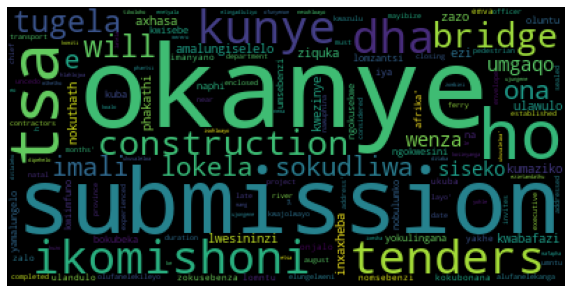

In [26]:
#Graphical EDA (wordcloud)
def word_cloud (df, column_name):
    wc = WordCloud()
    text = df[column_name].values
    msg_cloud = wc.generate(str(text))
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.show
    
    return wc

word_cloud(df, 'text')

#### Balanced/Imbalanced Data

A histogram of the unique elenment the target column (lang_id) is important to visualize the level of balance/imbalance of the data. In a situation where the data is highly imbalanced, tweaking becomes necessary to balance the data. 

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


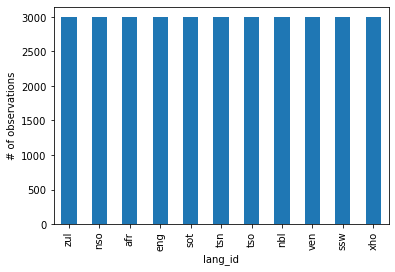

In [27]:
lang_id_labels = list(df.lang_id.unique())
print(lang_id_labels)

df['lang_id'].value_counts().plot(kind = 'bar')
plt.ylabel("# of observations")
plt.xlabel("lang_id")
plt.show()

From the bar gragh above, it is clear that we are working with a balanced data.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In order for our Machine Learning model to determine the language of the text, the model has to analyze the text. Machine learning models can not handel categorical data without preprocessing of the data. In our case, we use the CountVectorizer to preprocess the column of data that will be fed to the Machine Learning model.

The CountVectorizer is used to transform column of text into a vector on the basis of the frequency (count) of each word that occurs in the entire column of text

Before we apply the CountVectorizer, it is important to clean up the column of text. The clean up precess include the following steps:
<ul>
    <li>Replace all URLs with 'url-web', if there is any.</li>
    <li>Set all elements in the column of test to lower case</li>
    <li>Remove punctuations</li>
</ul>

In [458]:
all_txt = df.copy()

In [459]:
#Replace all URLs with 'url-web'

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_txt['text'] = all_txt['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [460]:
#Define fuction to remove punctuation

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [461]:
#all_txt['text'] = all_txt['text'].str.lower() #Not necessary because the Vectorizer will handle this.
all_txt['text'] = all_txt['text'].apply(remove_punctuation) #Remove puctuations

In [464]:
betterVect = CountVectorizer(min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 7),
                             lowercase = True,
                             analyzer = 'char_wb'
                             )

It is important that the test data is in the for processed training data, so the block of code below is used to replace URLs, remove puctuations and set the column of text to lowers case.

In [465]:
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)
#df_test['text'] = df_test['text'].str.lower() #Not necessary because the Vectorizer will handle this.
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [466]:
X_train = betterVect.fit_transform(all_txt['text'])
X_test = betterVect.transform(df_test['text'])

In [467]:
y_train = all_txt.lang_id

In [319]:
#x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.20)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that is/are able to classify whether or not a person believes in climate change, based on their novel tweet data.

---

In the section, several models were trained with the processed data, and the trained models were used to make predictions. These models include:
<ul>
    <li>Logistic Regression</li>
    <li>AdaBoost Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Support Vector Classifier</li>
    <li>Multinomial Naive Bayes</li>
    <li>Stacked Classifier</li>
</ul>

In [102]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
logreg.score(x_train, y_train)


1.0

In [105]:
AdBoost = AdaBoostClassifier()
AdBoost.fit(x_train, y_train)
y_pred_AdBoost = AdBoost.predict(x_test)
AdBoost.score(x_train, y_train)

0.564469696969697

In [107]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
RF.score(x_train, y_train)

1.0

In [132]:
SVC = LinearSVC()
SVC.fit(X_train , y_train)
#y_pred_SVC = SVC.predict(x_test)
SVC.score(X_train, y_train)

C:\Users\shola\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


1.0

In [468]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
#y_pred_MNB = MNB.predict(x_test)
MNB.score(X_train, y_train)


0.9998787878787879

In [469]:
estimators = [('MNB', MultinomialNB())]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train)
#y_pred_clf = clf.predict(x_test)
clf.score(X_train, y_train)

0.9998787878787879

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

We check the performance of our models by visualizing the Confussion Matrices of the model predictions as well as their accuracy.

In [103]:
ac = accuracy_score(y_test, y_pred_logreg)
cm = confusion_matrix(y_test, y_pred_logreg)

print("Log Reg Accuracy is :",ac)
print("Log Reg Confusion Matrix \n", cm)

Log Reg Accuracy is : 0.9960606060606061
Log Reg Confusion Matrix 
 [[638   0   0   0   0   1   0   0   0   0   0]
 [  0 562   0   0   0   0   0   0   0   0   0]
 [  0   0 578   0   0   1   0   0   0   1   6]
 [  0   0   0 573   0   0   1   0   0   0   0]
 [  0   0   0   0 597   0   0   0   0   0   0]
 [  0   0   0   0   0 613   0   0   0   0   3]
 [  0   0   0   1   1   0 668   0   0   0   0]
 [  0   0   0   0   0   0   0 569   0   0   0]
 [  0   0   0   0   0   0   0   0 632   0   0]
 [  0   0   1   0   0   0   0   0   0 564   0]
 [  0   0   3   0   0   2   0   0   0   5 580]]


In [106]:
ac = accuracy_score(y_test, y_pred_AdBoost)
cm = confusion_matrix(y_test, y_pred_AdBoost)

print("AdaBoost Accuracy is :",ac)
print("AdaBoost Confusion Matrix \n", cm)

AdaBoost Accuracy is : 0.5686363636363636
AdaBoost Confusion Matrix 
 [[633   0   1   0   0   5   0   0   0   0   0]
 [  1 533   0   0   0   1   0   0   0   6  21]
 [  0   0  17   0   5 533   0   5   0  26   0]
 [  0   0   0 557   5   0   8   0   4   0   0]
 [  0   0   1  24 556   0   0   0  12   4   0]
 [  5   1   0   0   0 602   0   7   0   0   1]
 [  0   0   0 603  29   0  27   0   7   4   0]
 [  0   0   2  52  41   9   0 182 272   0  11]
 [  0   0   0   0   0  43   0   0 589   0   0]
 [  2   1   5   0   1 498   0   4   0  54   0]
 [  0   1   8   0   6 553   0   5   0  14   3]]


In [108]:
ac = accuracy_score(y_test, y_pred_RF)
cm = confusion_matrix(y_test, y_pred_RF)

print("Random Forest Accuracy is :",ac)
print("Random Forest Confusion Matrix \n", cm)

Random Forest Accuracy is : 0.9865151515151516
Random Forest Confusion Matrix 
 [[639   0   0   0   0   0   0   0   0   0   0]
 [  0 562   0   0   0   0   0   0   0   0   0]
 [  0   0 559   0   0   4   0   0   1   6  16]
 [  0   0   0 572   0   0   2   0   0   0   0]
 [  0   0   0   0 597   0   0   0   0   0   0]
 [  0   1   0   0   0 589   0   0   0   2  24]
 [  0   0   0   1   0   0 669   0   0   0   0]
 [  0   0   0   0   0   0   0 569   0   0   0]
 [  0   0   0   0   0   0   0   0 632   0   0]
 [  0   1   2   0   0   2   0   0   0 557   3]
 [  0   2   5   0   0   9   0   0   0   8 566]]


In [116]:
ac = accuracy_score(y_test, y_pred_SVC)
cm = confusion_matrix(y_test, y_pred_SVC)

print("Support Vector Classifier Accuracy is :",ac)
print("Support Vector Classifier \n", cm)

Support Vector Classifier Accuracy is : 0.9959090909090909
Support Vector Classifier 
 [[639   0   0   0   0   0   0   0   0   0   0]
 [  0 562   0   0   0   0   0   0   0   0   0]
 [  0   0 577   0   0   1   0   0   0   1   7]
 [  0   0   0 573   0   0   1   0   0   0   0]
 [  0   0   0   0 596   0   1   0   0   0   0]
 [  0   0   0   0   0 612   0   0   0   0   4]
 [  0   0   0   0   0   0 670   0   0   0   0]
 [  0   0   0   0   0   0   0 569   0   0   0]
 [  0   0   0   0   0   0   0   0 632   0   0]
 [  0   0   1   0   0   1   0   0   0 562   1]
 [  0   0   4   0   0   1   0   0   0   4 581]]


In [97]:
ac = accuracy_score(y_test, y_pred_MNB)
cm = confusion_matrix(y_test, y_pred_MNB)

print("MNB Accuracy is :",ac)
print("MNB Confusion Matrix \n", cm)

Accuracy is : 0.9993939393939394
Confusion Matrix 
 [[639   0   0   0   0   0   0   0   0   0   0]
 [  0 562   0   0   0   0   0   0   0   0   0]
 [  0   0 585   0   0   0   0   0   1   0   0]
 [  0   0   0 574   0   0   0   0   0   0   0]
 [  0   0   0   0 597   0   0   0   0   0   0]
 [  0   0   0   0   0 615   0   0   0   0   1]
 [  0   0   0   0   0   0 670   0   0   0   0]
 [  0   0   0   0   0   0   0 569   0   0   0]
 [  0   0   0   0   0   0   0   0 632   0   0]
 [  0   1   0   0   0   0   0   0   0 564   0]
 [  0   1   0   0   0   0   0   0   0   0 589]]


In [121]:
ac = accuracy_score(y_test, y_pred_clf)
cm = confusion_matrix(y_test, y_pred_clf)

print("Stacked Classifier Accuracy is :",ac)
print("Stacked Classifier Confusion Matrix \n", cm)

Stacked Classifier Accuracy is : 0.9995454545454545
Stacked Classifier Confusion Matrix 
 [[639   0   0   0   0   0   0   0   0   0   0]
 [  0 562   0   0   0   0   0   0   0   0   0]
 [  0   0 584   0   0   0   0   0   0   0   2]
 [  0   0   0 574   0   0   0   0   0   0   0]
 [  0   0   0   0 597   0   0   0   0   0   0]
 [  0   0   0   0   0 616   0   0   0   0   0]
 [  0   0   0   0   0   0 670   0   0   0   0]
 [  0   0   0   0   0   0   0 569   0   0   0]
 [  0   0   0   0   0   0   0   0 632   0   0]
 [  0   1   0   0   0   0   0   0   0 564   0]
 [  0   0   0   0   0   0   0   0   0   0 590]]


In [456]:
predictions = MNB.predict(X_test)


df_CSV = pd.DataFrame({"index": df_test['index'].values,
                   "lang_id": predictions,
                  })

df_CSV.to_csv("result_MNB_fullyTrained_Analyzer_CharWb.csv", index=False)

Although, the Stacked Classifier outperformed all the other models on prediction of the laguage id of the validation set, the Multinomial Naive Bayes model performed best when fed with unseen data.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

### Naive Bayes Multinomial Model

In a Naive Bayes Multinomial Model, features are assumed to be generated from a multinomial distribution, rather than the slightly more simple Gaussian Naive Bayes model that assumes features are generated from a Gaussian distribution. The Multinomial Naive Bayes model is modeled with the best fit multinomial distribution. The model works by computing a large table of probabilities with the given data. Using the Liklihood -- P(feature|Label), the Prior-- P(Label), and the Marginal Liklihood-- P(feature), the model takes advatage of Baye's Theorm to compute P(Label|feature). The P(Label|feature) with the highest probability gets predicted as the correct language.